# 浅谈JSP
---
原文：https://zhuanlan.zhihu.com/p/42343690

## 容易混淆的概念
---

我们经常开口闭口“服务器”、“服务器”的，其实“服务器”是个很容易引发歧义的概念，我能想到的就有3点：

**软件概念的服务器和硬件概念的服务器**：

软件概念上，只要是一台硬件配置正常、装有操作系统、插着电能上网，并且安装特定软件的电脑，都可以称为服务器。比如你要学习数据库了，于是你装了MySQL服务端，那么此时你的电脑就是一个MySQL服务器。然后你又装了SVN服务端，那么此时你的电脑既是MySQL服务器，又是SVN服务器。Tomcat服务器同理。

硬件概念上，服务器本质上也是一台电脑，只不过配置高的同时长相丑了点，基本就是一个冰冷的大铁柜。

**Web 服务器？Web容器？(web server, web container)**

其实，Tomcat服务器 = Web server + Servlet/JSP container（Web container）。

> A web container (also known as a servlet container) is the component of a web server that interacts with Jakarta Servlets.

Web server的作用是接收客户端的requests，给客户端作出响应。但是很明显，服务器不止静态资源呀，所以客户端发起请求后，如果是动态资源，Web服务器不可能直接把它响应回去（比如JSP），因为浏览器只认识静态资源。所以对于JavaWeb程序而言，还需要JSP/Servlet container，JSP/Servlet container的基本功能是把动态资源(jsp)转换成静态资源。我们JavaWeb工程师需要使用Web server和JSP/Servlet container，而通常这两者会集于一身，比如Tomcat。

> Apache Tomcat, one of the most popular web server and Servlet container for Java code.

## 动乱年代
---

1995年5月，SUN公司发布了Java。名字取得很随意，据说是因为那群创始人当时正好在咖啡店激烈讨论取什么名字。其中有一个人望着手中的咖啡突然灵机一动：卧槽，就叫Java吧。这就好比农村生娃，老爹一看，卧槽，这孩子骨骼惊奇，面相清秀，就叫...二狗子吧，的感觉一样一样的。几乎同年，也不知道稍早还是稍晚，反正不重要，PHP也发布了。当时的人们还不知道，它将被黑为“世界上最好的语言”。次年，一个叫布兰登·艾奇（Brendan Eich，1961年～）的技术员，应老板要求花了10+天，借鉴几大语言的优秀特性（包括Java），写出了LiveScript。而为了在发布时蹭Java热度扩大宣传，不惜改名JavaScript。所谓慢工出细活，所以...JavaScript只写了10多天，自然是...好在后来也挽救回来了，现在好歹是GitHub提交量最多的语言，而前端这几年也是火得不行。

我们知道，浏览器能通过解析html语句渲染出页面。关键是这些html语句怎么来的？是不是需要浏览器通过http请求某个页面，然后服务器根据浏览器的请求，通过http响应对应页面的html语句回去？而服务器端是我们用Java开发的，它用什么返回的这一大堆html语句？答案就是：Servlet！

随手用MyEclipse新建一个Servlet，你会看到，生成的Servlet默认的模板是这样的：
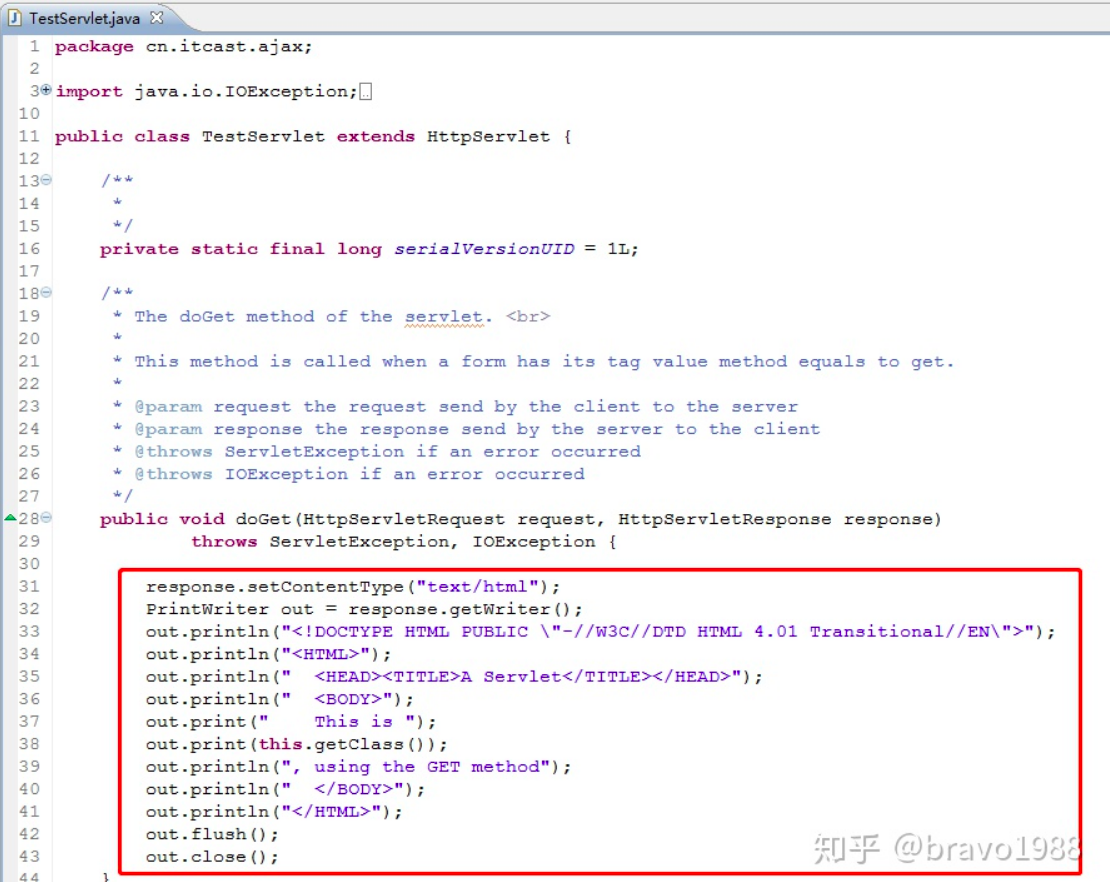

可以看到Servlet的doGet()和doPost()方法体中有响应html片段的代码。这其实是上古时期开发习惯的“遗迹”。都2018年了，MyEclipse还自作聪明，以为你会在Servlet中手动输出HTML片段。诚然，在早期的JavaWeb开发中，我们的程序猿祖先确实有那么一段黑暗时光，但那是因为当时还没有现在这么多、这么好用的模板和框架。

> Each time the web server receives a request for a servlet, the server spawns(产卵) a new thread and calls service. The service() method checks the HTTP request type (GET, POST, PUT, DELETE, etc.) and calls doGet, doPost, doPut, doDelete, etc. methods as appropriate.

上古时代，通常情况是美工写好html静态页面后，丢给Java程序员。Java程序猿在Servlet中调用Service()拿到数据后，逐句复制html静态页面上的html语句到Servlet的中，根据情况将后端的数据与html片段拼接在一起，然后以如下方式疯狂输出:

```java
out.println("<span>用户名是："+user.age+<"/span>");
```

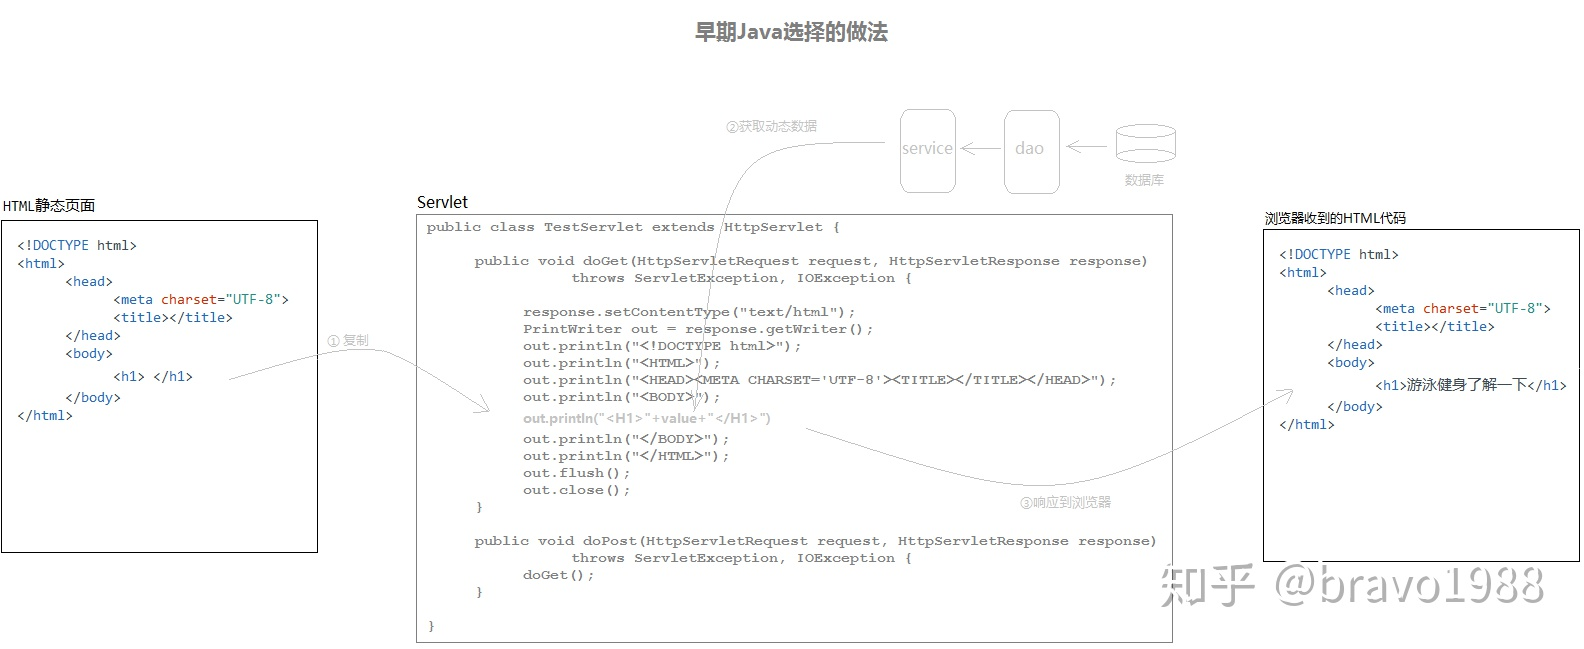
> 图中做法就是：把html代码从页面复制到Servlet，在Servlet中拼接数据再响应输出

按这种方式，要想拼接数据并完整输出一个html页面，没个几百上千行out.println()是不可能的。所以基本上敲完两个页面两根手指就麻了。

而同时期的PHP，http://ASP.Net 就优秀得多了，人家压根不搞你这繁琐的一套。它们选择在html页面中嵌入相应语言来引入动态数据，避免了手动拷贝html片段输出的尴尬局面。
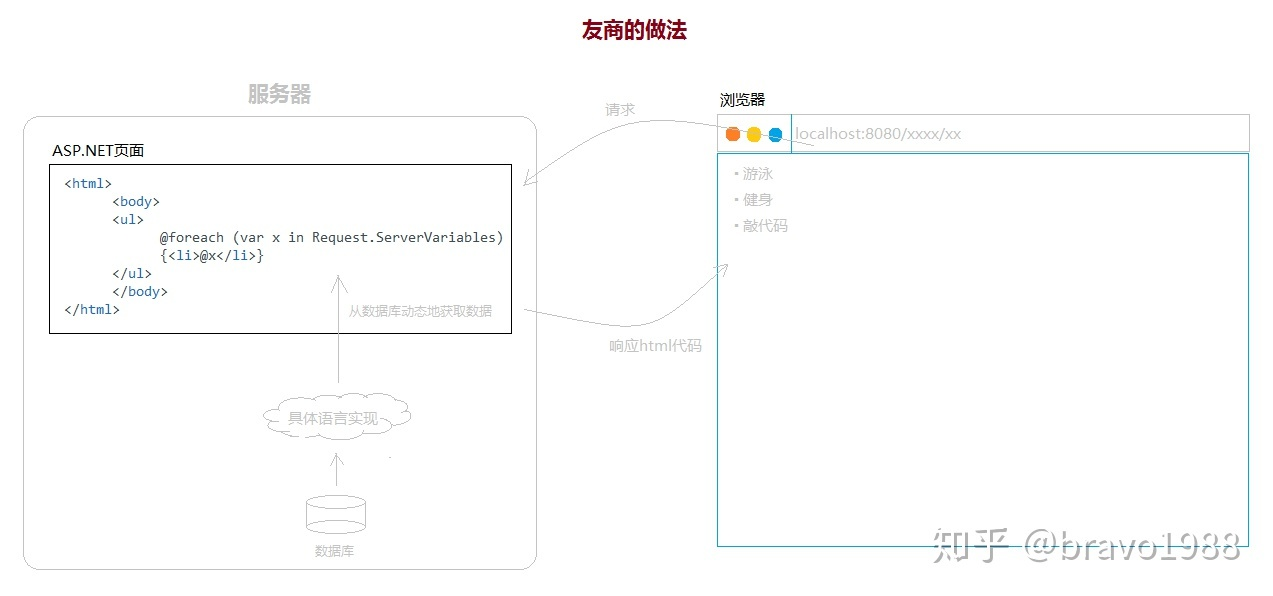
> 直接在html页面中写代码插入数据

因为仔细想来，我们的主要目的就是希望在最终输出的html的代码中嵌入后台数据罢了。除了把html语句拿出来在Servlet里拼接好再输出这种方式外，我们也可以直接在html语句中写入动态数据（注意，不是HTML文件，必须是JSP之类的动态模板文件中的HTML语句）。而这两种几乎是完全相反的设计思路！

一部分Java程序员一看，就傻眼了：我靠，PHP还真是世界上最好的语言啊，Web开发竟然如此之简单！老子再也不想复制粘贴了！于是转向了PHP或者其他语言的开发。就这样，Java流失了一部分程序员。SUN公司一看，这不行啊，Java也要搞一个。于是，JSP应运而生。


## JSP是个啥
---
JSP全称Java Server Page，直译就是“运行在服务器端的页面”。上面已经介绍过，我们可以直接在JSP文件里写HTML代码，使用上把它当做HTML文件。而且JSP中HTML/CSS/JS等的写法和HTML文件中的写法是一模一样的。但它毕竟不是HTML，而且本质差了十万八千里。因为我们还可以把Java代码内嵌在JSP页面中，很方便地把动态数据渲染成静态页面。这一点，HTML打死都做不到。

当有人请求JSP时，服务器内部会经历一次动态资源（JSP）到静态资源（HTML）的转化，服务器会自动帮我们把JSP中的HTML片段和数据拼接成静态资源响应给浏览器。也就是说JSP是运行在服务器端，但最终发给客户端的都已经是转换好的HTML静态页面（在响应体里）。

>**JSP Compilation**  
>When a browser asks for a JSP, the JSP engine first checks to see whether it needs to compile the page. If the page has never been compiled, or if the JSP has been modified since it was last compiled, the JSP engine compiles the page.  
> The compilation process involves three steps −
+ Parsing the JSP.
+ Turning the JSP into a servlet.
+ Compiling the servlet.

JSP = HTML + Java片段（各种标签本质上还是Java片段）

> Notes:  
1.JSP是服务器端用来将动态页面转化为静态页面的.  
2.浏览器只能解析静态页面.  

但所谓的“JSP和HTML相似”只是JSP给我们的表面印象。我们还要继续往下挖一挖。实际上，JSP和HTML差远了。JSP本质是一个Java类（Servlet），是在服务器混的，只不过它输出结果是HTML。蜜蜂产出蜂蜜，但是蜜蜂不是蜂蜜啊！在揭开JSP真身之前，我们先来复习一下什么是Servlet。

> A servlet is simply a java class which responds to a particular type of network request - most commonly an HTTP request.


## Servlet是什么？
---

+ 一个Java类，运行在Servlet容器中（Tomcat）
+ 负责接收请求
+ 调用Service()处理数据
+ 负责响应数据

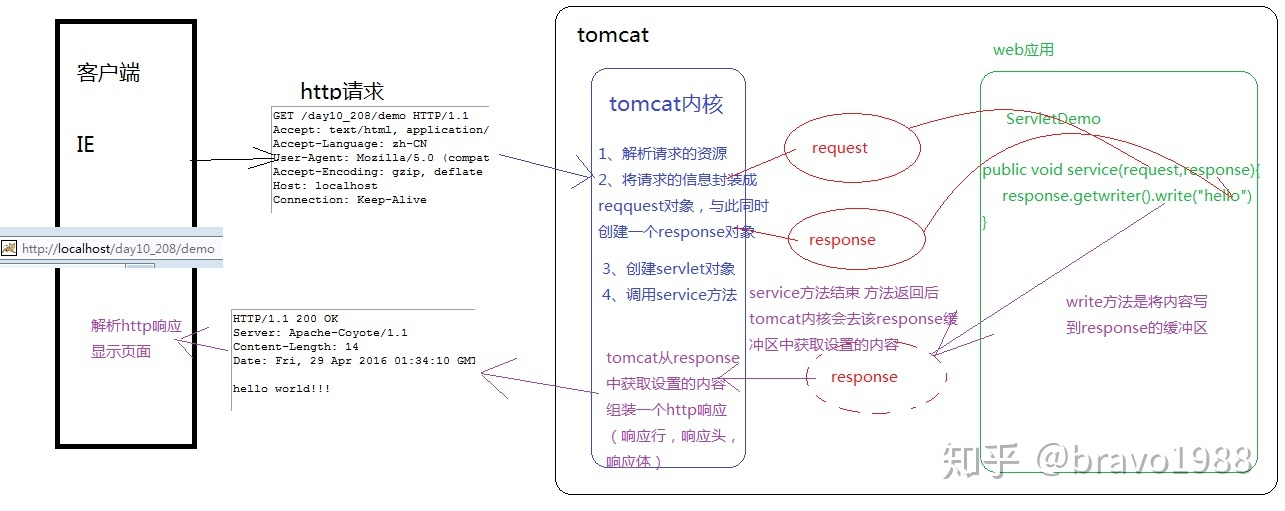


接下来谈谈为什么说JSP本质就是一个Servlet。具体的源码我就不带大家看了，我也看不懂。大致流程是这样的：

+ web container接收到以.jsp为扩展名的URL的访问请求时，它将把该请求交给JSP engine去处理。Tomcat中的JSP engine就是一个Servlet程序，它负责解释和执行JSP页面。

+ 每个JSP 页面在第一次被访问时，JSP引擎将它翻译成一个Servlet(servlet是个java类)源程序，接着再把这个Servlet源程序编译成Servlet的class类文件，然后再由web container像调用普通Servlet程序一样的方式来装载和解释执行这个由JSP页面翻译成的Servlet程序(web container 调用servlet的service()方法)。

+ 【存放位置】Tomcat把为JSP页面创建的Servlet源文件和class类文件放置在“<TOMCAT_HOME>\work\Catalina\<主机名>\<应用程序名>\”目录中，Tomcat将JSP页面翻译成的Servlet的包名为org.apache.jsp.<JSP页面在WEB应用程序内的目录名> 。

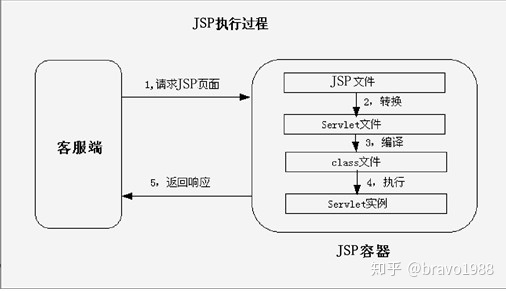

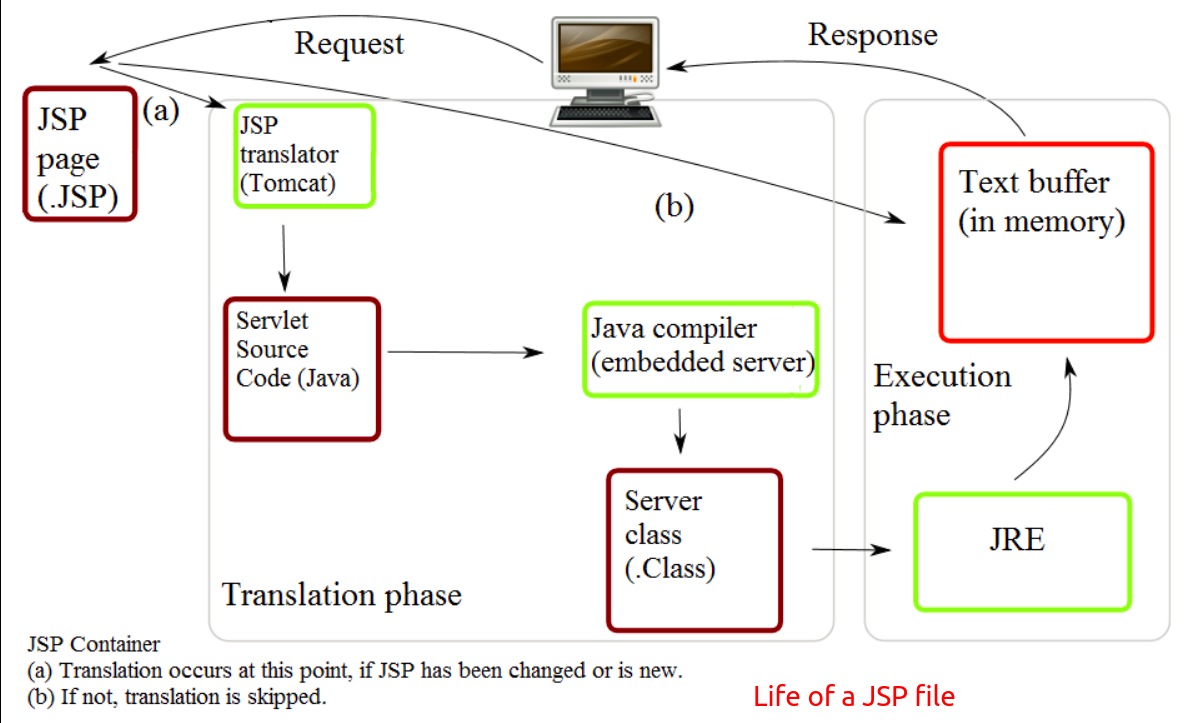


有点晕？来捋一捋。

原本，我们需要把美工的HTML代码一行行复制到Servlet中，然后拼接数据，最后向客户端响应拼接好的HTML页面。

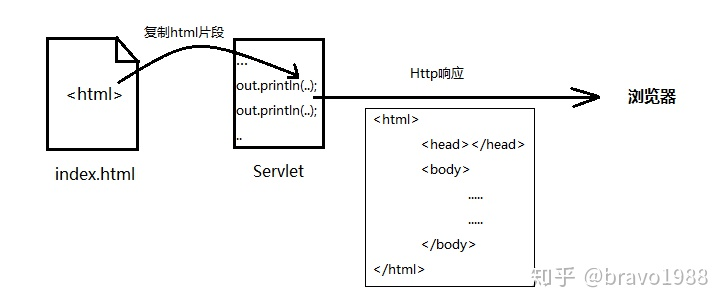
> 响应给浏览器的HTML语句在http响应体里，描述了返回的页面，浏览器接收后根据代码“画出”页面


后来我们嫌麻烦，搞了JSP，就不用一行行复制HTML代码了，而是在JSP中直接写HTML代码和Java代码，后期JSP编译成一个Servlet，通过Java代码获取后台数据后拼接到HTML片段中，最终通过out.println()输出。

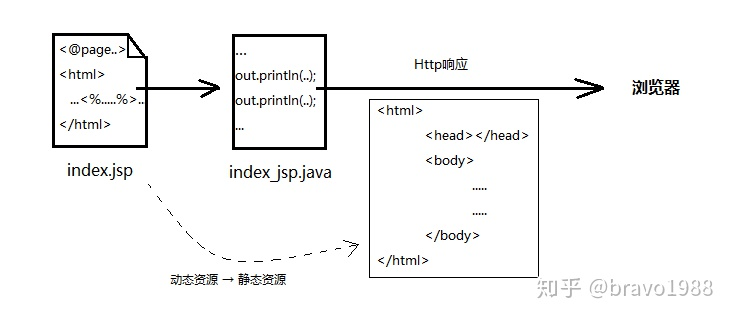
现在可以回答上面的问题：为什么完全相反的两种设计理念却完成了同样的需求呢？答案可以有多种，但是其中一种就是：这两种殊途同归，最终实现是一样的，都是在一个Servlet中输出！

我们不妨打开index_jsp.java，观察index.jsp被翻译成Servlet后的源码，可以看到：

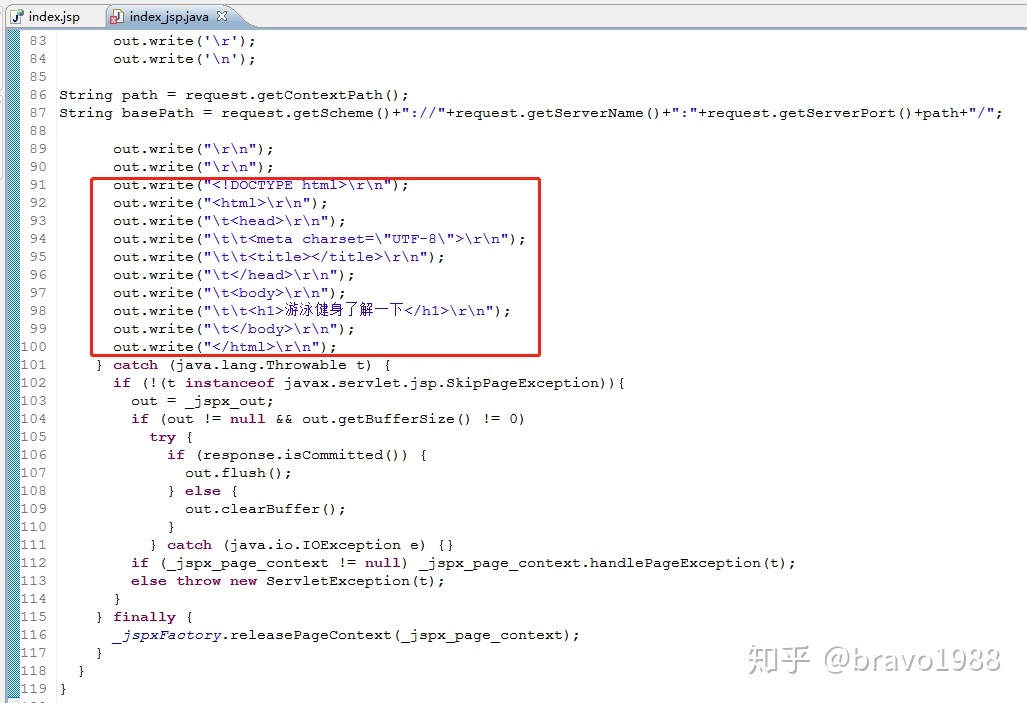

也就是说，虽然我们不用像上古时期一样手动复制html语句到Servlet了，但是JSP编译后的Java类其实还是在out.println()输出。和我们手动复制是一样的结果。

而index_jsp.java这个类继承了HttpJspBase，而HttpJspBase间接实现了Servlet接口。所以可以说，index.jsp被翻译后的Java类也是一个Servlet，所以JSP本质也是一个Servlet。

绕了这么一大圈，我们终于明白：

原来，为了不让Java程序员一行行复制HTML代码到Servlet里，SUN公司干脆让Java程序员直接把HTML写在了Servlet里！但是毕竟SUN还没有那么明目张胆，好歹让这个Servlet伪装了一把，打扮成JSP，然后跟程序员说：看，我搞了个JSP，这家伙可牛逼了，你能在上面同时写HTML和Java代码哦。

得了吧，等你写完JSP，回头访问时，Tomcat就把这个JSP翻译成Servlet，原先写在JSP里的HTML代码就自动放在了out.println()里啦！相当于程序帮我做了“逐行复制HTML代码到Servlet”这一步。（想起来手就麻！）

至此，我们已经知道，JSP就是一个Servlet。那么丝毫不用怀疑，今后无论你在JSP看到什么奇奇怪怪的东西，只要不报错，说明JSP就有足够自信把它变成Java代码的一部分：

+ 要么被当成字符串输出（HTML片段）
+ 要么本身就是Java片段
+ 要么会转成Java片段（EL表达式）

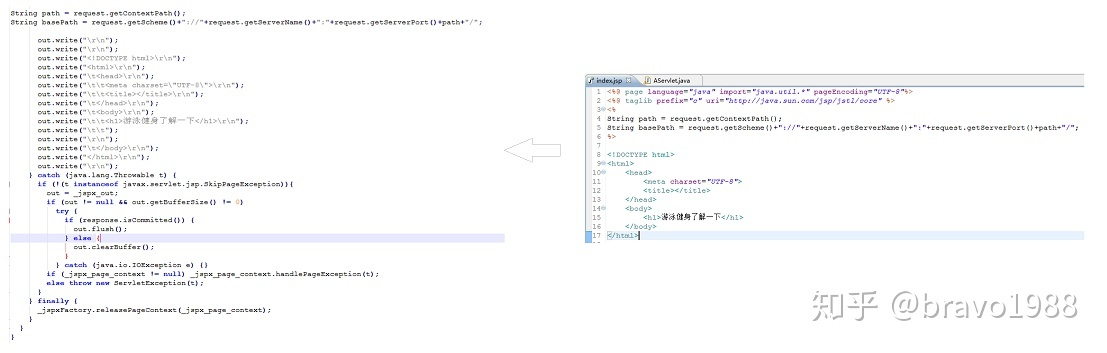
> 没有EL表达式时Servlet的源码（右图是JSP，左图是JSP编译后的Servlet源码）


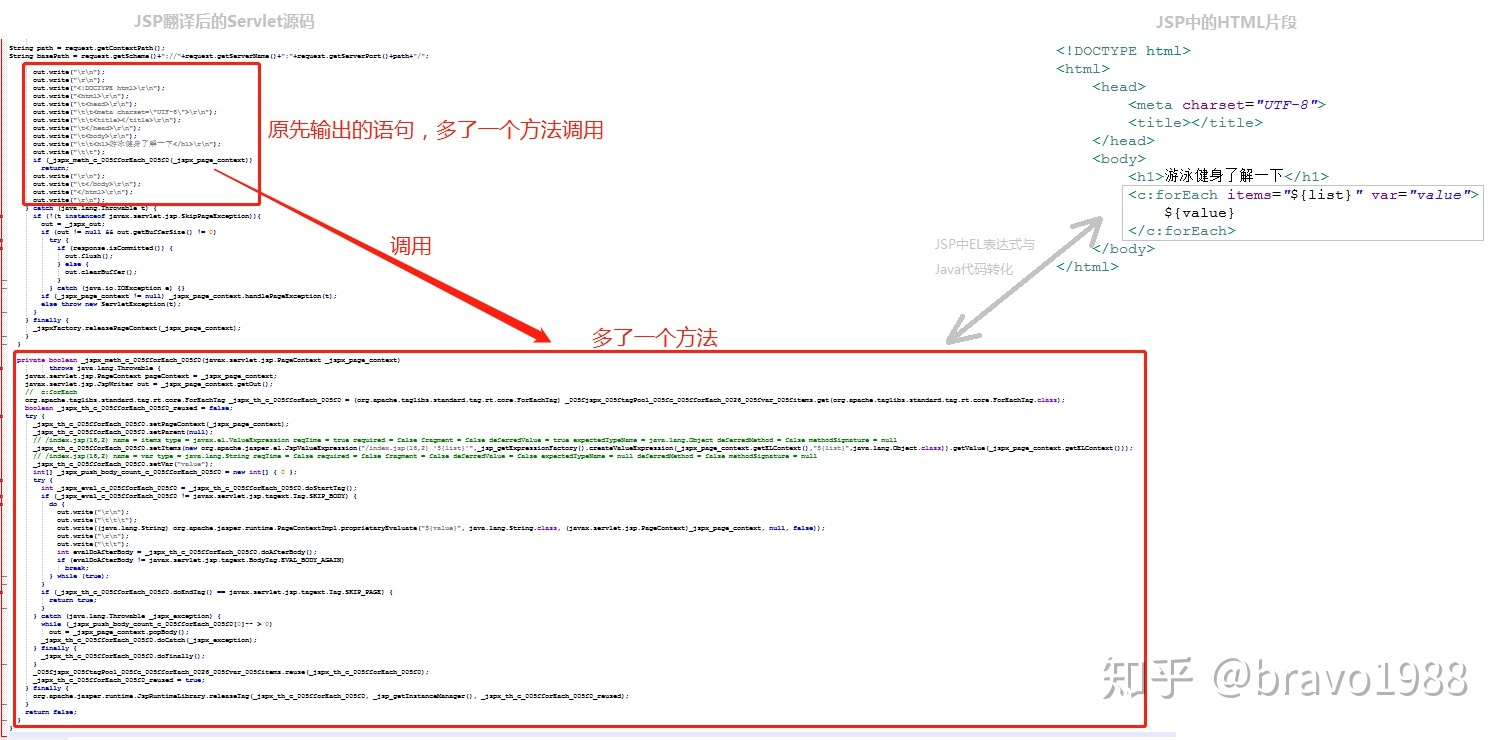
> JSP中添加了EL表达式后，Servlet源码的变化

所以，大家千万别把EL表达式想太难，记个语法，知道怎么用就行了。至于它怎么变成Java代码的，需要我们操心吗？

最后还要提醒一下EL表达式这些标签是在何时何地起作用的。很多人误以为EL表达式可以在浏览器起作用。根本原因还是对JSP不了解。JSP是服务器端的，所有操作必须在响应给浏览器之前做完。**这些标签，会在JSP文件编译成Servlet时，自动转化为Java代码，然后对数据做处理**。所以本质上和你在JSP页面写的<%%>之类的Java片段一样。它负责从变量（不确定的数）中取出数据，变成静态数据后（确定的数）贴在薄薄的一张HTML静态页面上。

想象一下，变量还未取出来之前，数据是立体的，圆鼓鼓的，而HTML静态页面则薄如一张纸。我们无法在二维面上放入三维物质。而EL表达式从变量取出来的数据则是一个常量，是个字符串一样的东西，可以轻轻地“贴”在HTML里。

至此，我们明白，JSP是立体的机器，在服务器内部，在服务器其他“同僚”的帮助下，生产一张张HTML静态页面让http带回去给浏览器显示。就像吐钞机与钞票的关系。


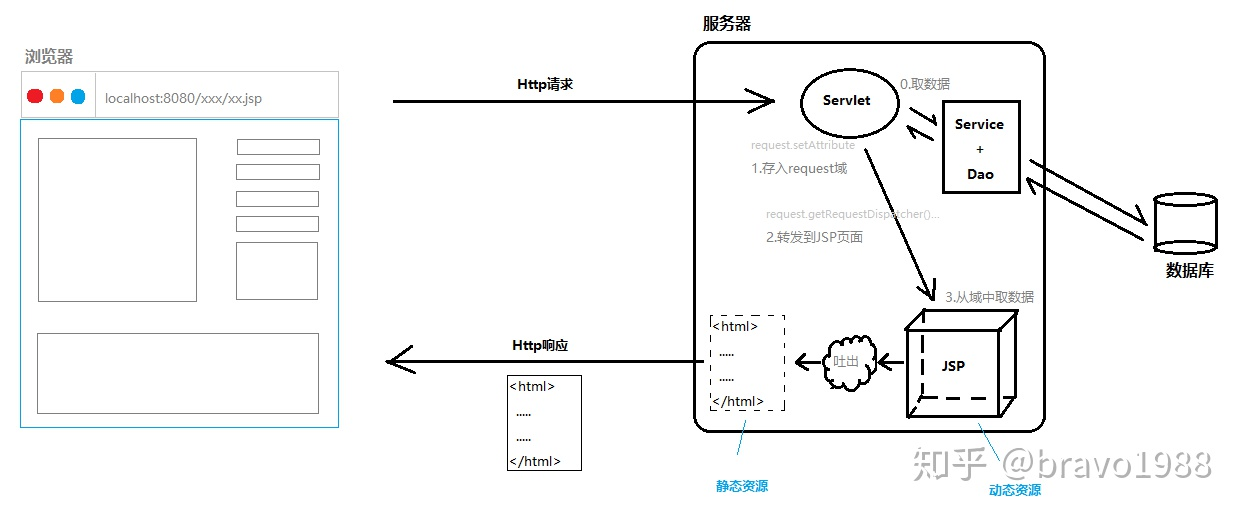

> 本质是动态资源到静态资源的转换（省略JSP转为Servlet输出的过程）

## 一个Http请求的冒险之旅
---

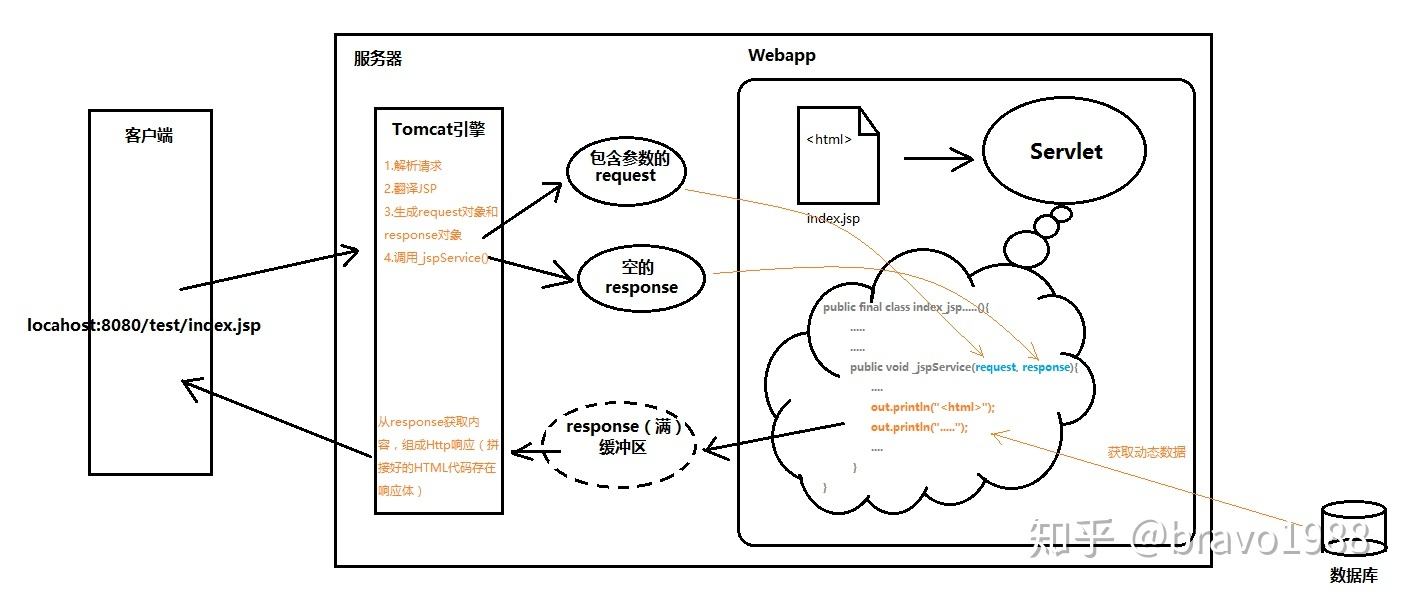

## JSP与AJAX+HTML
---
其实请求、响应这么一来一回，无非要的就两样东西：数据+HTML骨架。如果把服务器端比作淘宝卖家，客户端（浏览器）比作买家，而数据和HTML则是一件商品的两个重要组成部件。那么我们很自然地能够想到，其实运输方式至少可以有两种：

1. 卖家组装好商品后再发货（JSP）

2. 卖家把部件拆开，运到之后买家自己组装（AJAX+HTML）

JSP是服务器端的，它的局限性在于数据必须在返回给客户端之前就“装载”完毕。不然HTML都已经发出去了，你就没办法跑到浏览器里把数据给它安上。

而有了AJAX，就可以实现零件发送、目的地组装了。

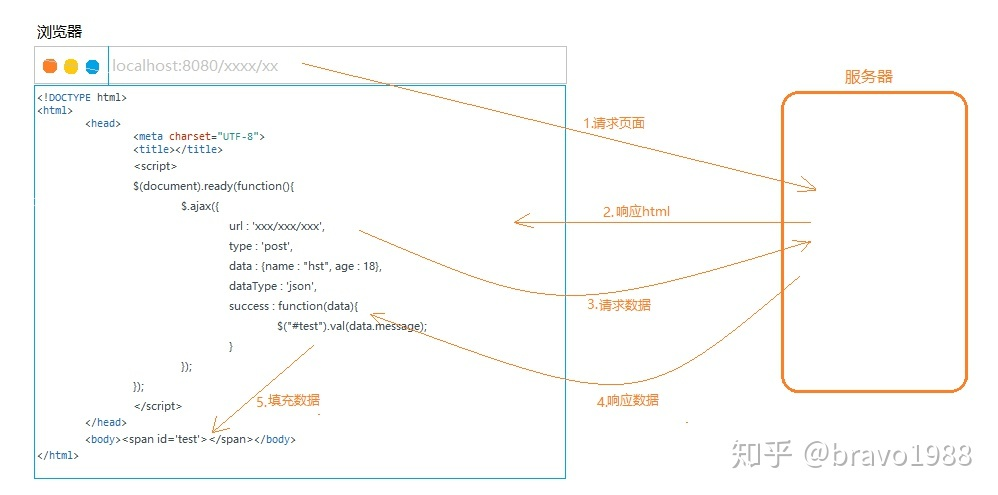


其实我对前端也不是很熟悉，只能给个大致的图。我至今没搞明白怎么才叫“前后端分离”。不用JSP，改用HTML+AJAX就是前端分离吗？好像也不完全是。以后有更深的体会时，有机会再和大家聊聊这个问题，挺有意思的。

对了，顺便说一句，初学者朋友是不是听说JSP被淘汰了，犹豫要不要学？别闹了，不学JSP你都没法学其他的模板技术。而且，你可能觉得很新奇的freemarker，其实学过JSP的话，要上手只要几小时。所以，还是有什么学什么，学好才是关键。

再强调一点，**虽然我们在浏览器地址栏输入localhost:8080/xxx/xxx.jsp，就显示出了当前页面，但那不是JSP页面，而是HTML页面。服务器并没有直接把JSP文件从服务端扔到客户端**！JSP是Java Server Page，是服务器端的东西。服务器的东西永远不可能直接在浏览器运行。浏览器只能接受静态页面。

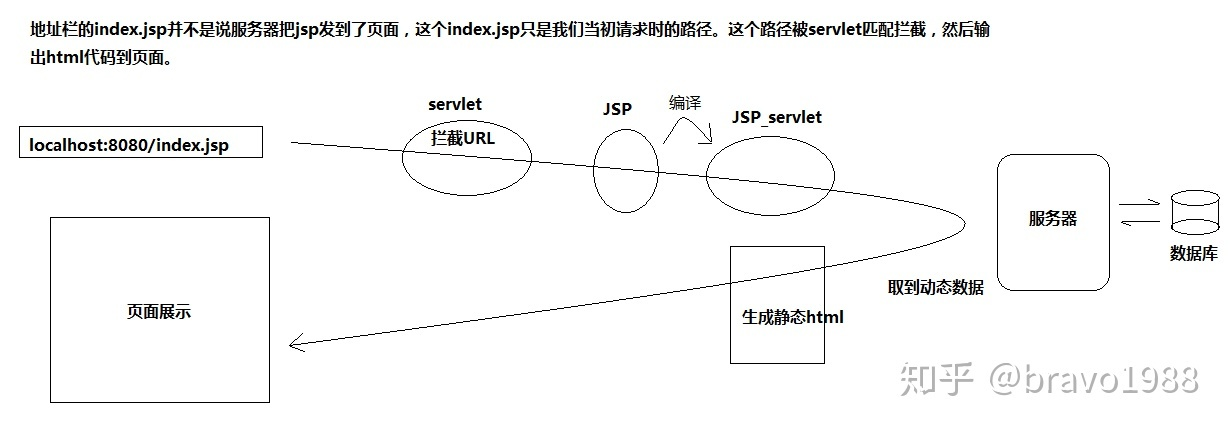
> 客户端之所以能显示页面，是因为JSP已经把数据和HTML片段拼凑成完整的静态页面返回给客户端

## MVC模式与JAVAEE三层架构
---

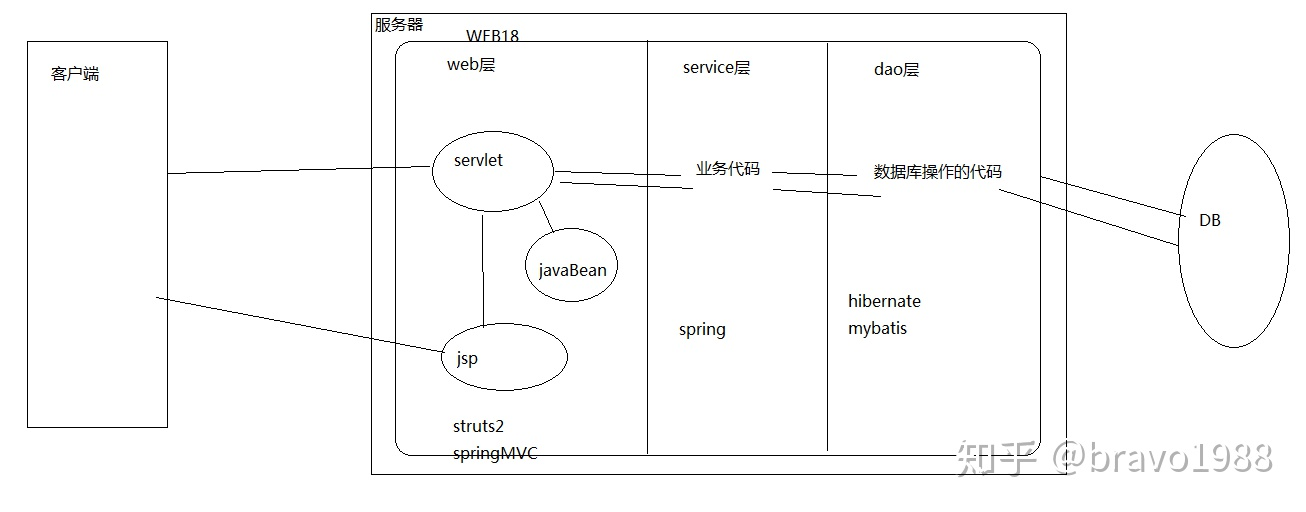

聊这个，纯粹是因为很多朋友很容易搞错一个概念，认为MVC模式是JavaEE独有的开发模式。其实不是的。MVC是web开发都有的一种模式，比如PHP开发web时也有MVC模式。而三层架构则是JavaEE的：Controller/Service/Dao。分层开发是为了使代码逻辑更加清晰，也起到了一定的解耦合作用。

值得注意的是，MVC只是在web层。当然，如果站在更高的角度，可以看成这样：

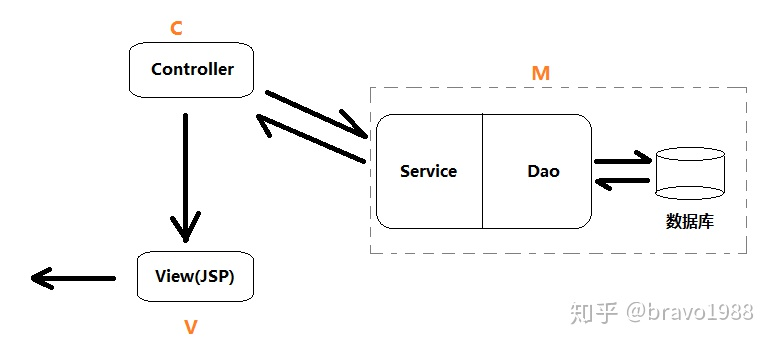
